In [47]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Machine learning basics

* Modelling
* Model correctness
* Overfitting/underfitting
* Training/testing data
* Sklearn basics

## What is a model?

* A **simplified** representation

## Model types

* Regression
  * What is the value of 'Y' at 'X?'
* Classification
  * Is it a 'X'?
* Clustering
  * Is this closest to 'X' or 'Y'?

## Regression

* Using a model to predict numerical data
  * Salaries, statistics, age, sizes, etc.

## Example: Linear regression

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Linear_Function_Graph.svg/300px-Linear_Function_Graph.svg.png)

## Example: Plotting number of suicides and US science spending

* Pandas: A library for reading data files
  * We'll cover this much more in depth later
  
```python
import pandas
```

In [48]:
import pandas as pd
%matplotlib inline
data = pd.read_csv("data/science.csv")
data

Year  US science spending  Suicides
0   1999                18079      5427
1   2000                18594      5688
2   2001                19753      6198
3   2002                20734      6462
4   2003                20831      6635
5   2004                23029      7336
6   2005                23597      7248
7   2006                23584      7491
8   2007                25525      8161
9   2008                27731      8578
10  2009                29449      9000

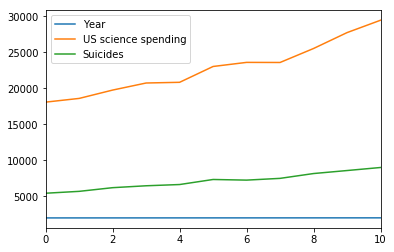

In [49]:
data.plot()

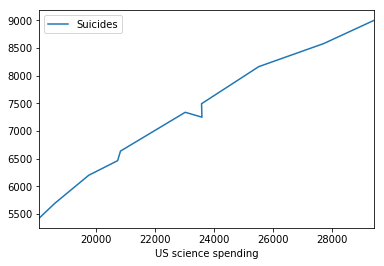

In [50]:
# Errrm, ups, what I really wanted was the science spending on the x axis and the suicides on the Y
data.plot(x = 1, y = 2)

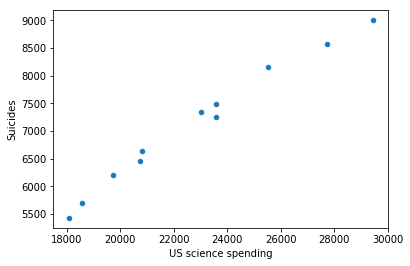

In [51]:
# Ok, but why the line? Let's do a scatter plot
data.plot.scatter(x = 1, y = 2)

## Uh, looks close to a line, right?! Let's try to draw a straight line between the points


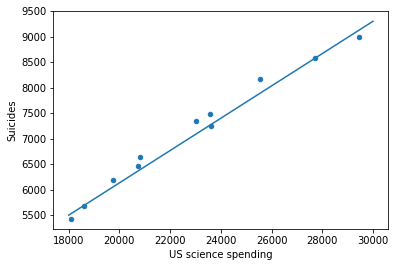

In [52]:
import matplotlib.pyplot as plt
data.plot.scatter(x = 1, y = 2)
plt.plot([18000, 30000], [5500, 9300])

## We can now do predictions!

We can simply look at the graph to find out how many murders we will have if we change the US science spending.

* Unfortunately it's pretty hard to read it out graphically, so let's get the formula

$y = \alpha x + \beta$

1. We can find the slope of the triangle...

2. And then we can use the slope to extrapolate the point $(18000, 5500)$

## Introducing sklearn

* **Scikit-learn** is a pretty cool machine learning framework with a lot of tools
  * https://scikit-learn.org/

In [53]:
import sklearn

## Improving our model

* Before, I was just taking a random guess on what was a good model, luckily `sklearn` is much better at guessing than I am.
  * We can use `sklearn` to construct a `LinearRegression` model
  
* **Regression** means that we *regress* towards a better model
  * So we are actively trying to find the perfect linear model ($\alpha x + \beta$) that fits our data
  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [54]:
import sklearn.linear_model
sklearn.linear_model.LinearRegression?

## Fitting a model

* Now that we know what model to use, we have to **train** it or **fit** it to our data

In [58]:
xs = data['US science spending']
ys = data['Suicides']

In [61]:
xs_reshape = np.array(xs).reshape(-1, 1)

In [63]:
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Note:** sklearn expects the `xs` as an array of at least one element (for reasons we will se later)

In [64]:
model.coef_

array([0.31270829])

In [65]:
model.intercept_

-21.489696197674675

## You can now use the model to predict

In [69]:
predicted = model.predict(xs_reshape)
model.predict([[10000]])

array([3105.59322164])

## Classification

* What if we don't want numbers but classes?
  * Cars, weekdays, emotions, etc.

## Example: decision tree classifier

![](images/decision-tree.png)

## Example: predicting flower classes

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [70]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

In [73]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [75]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [71]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [76]:
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [77]:
model.predict([[6.1, 2.8, 4. , 1.3]])

array([1])

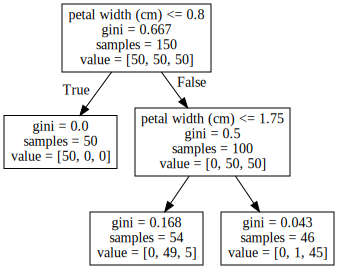

In [78]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG
graph = Source( export_graphviz(model, out_file=None, feature_names=iris.feature_names))
SVG(graph.pipe(format='svg'))

## Sklearn

https://scikit-learn.org/stable/index.html

## Exercise

* Import data using `sklearn.datasets.load_diabetes`:
```python
from sklearn.datasets import load_diabetes
X = load_diabetes().data
Y = load_diabetes().target
```
* Construct a `sklearn.linear_model.LinearRegression` model
* Fit it with the data
* What is the predicted disease progression given this input?
```python
[ 0.01628068, -0.04464164,  0.01750591, -0.02288496,  0.06034892,
  0.0444058 ,  0.03023191, -0.00259226,  0.03723201, -0.0010777 ]
```

## Recap

* Model types
    * Regression
    * Classification
    * Clustering
* Models are
    1. Constructed
    2. Trained
    3. Tested

## How do we know that the models are good?